In [1]:
import tkinter as tk
from tkinter import ttk, filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
import scipy.stats as stats
import seaborn as sns
from scipy.stats import anderson

# SAMPLE SIZE CALCULATIONS

In [2]:

# # Function to find the next smallest value in the table
# def find_k_smallest_value(table, confidence_level, reliability, k):
#     k_next_smallest = None
#     min_difference = float('inf')

#     for key, value in table.items():
#         samples, conf_level, rel = key
#         if conf_level == confidence_level and rel == reliability:
#             if value < k and k - value < min_difference:
#                 min_difference = k - value
#                 k_next_smallest = value

#     print("k next smallest: ", k_next_smallest)
#     return k_next_smallest

# # Function to find the sample size associated with a k-value
# def find_n_for_k(table, value, confidence_level, reliability):
#     num_samples = None

#     for key, val in table.items():
#         samples, conf_level, rel = key
#         if val == value and conf_level == confidence_level and rel == reliability:
#             num_samples = samples
#             break

#     return num_samples

# # GUI for sample size calculation
# def sample_size_calculation_window():
    
#     print("=" * 80)
#     print("SAMPLE SIZE CALCULATION USING TOLERANCE INTERVALS".center(80))
#     print("=" * 80)
#     print("\nPURPOSE:")
#     print("=" * 80)
#     print("Calculate the minimum sample size required for specified statistical\n"
#     "confidence and reliability, based on measurement and specification criteria.\n"
#     "\nINPUT VALUES:")
#     print("=" * 80)
#     print("- Confidence Level: Probability that the parameter lies within a certain range.\n"
#     "- Reliability: Likelihood that the system performs as expected under typical conditions.\n"
#     "- LSL (Lower Specification Limit): The lowest acceptable value for the measured parameter.\n"
#     "      ~~ Enter only this value for a one-sided test (lower limit) or both this and USL for a two-sided test.\n"
#     "- USL (Upper Specification Limit): The highest acceptable value for the measured parameter.\n"
#     "      ~~ Enter only this value for a one-sided test (upper limit) or both this and LSL for a two-sided test.\n"
#     "- Sample Mean: Average value of sample measurements.\n"
#     "- Sample Std Dev (Standard Deviation): Variability or spread of the sample measurements.\n"
#     "\nOUTPUT VALUES:")
#     print("=" * 80)
#     print("- k-Factor: Measures how far the sample mean is from the specification limits in standard deviations.\n"
#     "- Sample Size: Number of observations needed to meet confidence and reliability requirements.")
#     print("=" * 80)
#     print("\n\n\n")
#     window = tk.Tk()
#     window.title("Sample Size Calculation")

#     # GUI elements setup
#     tk.Label(window, text="Confidence Level:").grid(row=0, column=0)
#     tk.Label(window, text="Reliability:").grid(row=1, column=0)
#     tk.Label(window, text="LSL:").grid(row=2, column=0)
#     tk.Label(window, text="USL:").grid(row=3, column=0)
#     tk.Label(window, text="Sample Mean:").grid(row=4, column=0)
#     tk.Label(window, text="Sample Standard Deviation:").grid(row=5, column=0)

#     confidence_level_combo = ttk.Combobox(window, values=confidence_levels)
#     reliability_combo = ttk.Combobox(window, values=reliabilities)
#     LSL_entry = tk.Entry(window)
#     USL_entry = tk.Entry(window)
#     sample_mean_entry = tk.Entry(window)
#     sample_std_dev_entry = tk.Entry(window)

#     confidence_level_combo.grid(row=0, column=1)
#     reliability_combo.grid(row=1, column=1)
#     LSL_entry.grid(row=2, column=1)
#     USL_entry.grid(row=3, column=1)
#     sample_mean_entry.grid(row=4, column=1)
#     sample_std_dev_entry.grid(row=5, column=1)

#     confidence_level_combo.current(0)
#     reliability_combo.current(0)

#     def calculate_sample_size():
#         try:
#             confidence_level = int(confidence_level_combo.get())
#             reliability = int(reliability_combo.get())
#             LSL = LSL_entry.get().strip()
#             USL = USL_entry.get().strip()
#             sample_mean = float(sample_mean_entry.get())
#             sample_std_dev = float(sample_std_dev_entry.get())
            
#             print("=" * 80)
#             print("SAMPLE SIZE CALCULATION REPORT".center(80))
#             print("=" * 80)
            
#             results = []
#             report_header = (
#                 "\nENTERED PARAMETERS:\n"
#                 + "=" * 80 + "\n"
#                 f"Confidence Level: {confidence_level}%\n"
#                 f"Reliability: {reliability}%\n"
#                 f"Sample Mean: {sample_mean}\n"
#                 f"Sample Standard Deviation: {sample_std_dev}\n"
#                 f"LSL: {LSL if LSL else 'Not specified'}\n"
#                 f"USL: {USL if USL else 'Not specified'}\n"
#             )
            
#             if LSL:
#                 LSL = float(LSL)
#                 k_LSL = (sample_mean - LSL) / sample_std_dev
#                 if USL:  # Two-sided
#                     k_smallest_LSL = find_k_smallest_value(two_sided_table, confidence_level, reliability, k_LSL)
#                     num_samples_LSL = find_n_for_k(two_sided_table, k_smallest_LSL, confidence_level, reliability)
#                     results.append(f"Two-sided LSL: n = {num_samples_LSL} with k = {k_smallest_LSL}")
#                 else:  # One-sided
#                     k_smallest_LSL = find_k_smallest_value(one_sided_table, confidence_level, reliability, k_LSL)
#                     num_samples_LSL = find_n_for_k(one_sided_table, k_smallest_LSL, confidence_level, reliability)
#                     results.append(f"One-sided LSL: n = {num_samples_LSL} with k = {k_smallest_LSL}")

#             if USL:
#                 USL = float(USL)
#                 k_USL = (USL - sample_mean) / sample_std_dev
#                 if LSL:  # Two-sided
#                     k_smallest_USL = find_k_smallest_value(two_sided_table, confidence_level, reliability, k_USL)
#                     num_samples_USL = find_n_for_k(two_sided_table, k_smallest_USL, confidence_level, reliability)
#                     results.append(f"Two-sided USL: n = {num_samples_USL} with k = {k_smallest_USL}")
#                 else:  # One-sided
#                     k_smallest_USL = find_k_smallest_value(one_sided_table, confidence_level, reliability, k_USL)
#                     num_samples_USL = find_n_for_k(one_sided_table, k_smallest_USL, confidence_level, reliability)
#                     results.append(f"One-sided USL: n = {num_samples_USL} with k = {k_smallest_USL}")

#             report_text = (
#                 report_header 
#                 + "\nRESULTS:\n" 
#                 + "=" * 80 + "\n" 
#                 + "\n".join(results)
#             )
            
#             print(report_text)
#             print("=" * 80)
#             result_label.config(text="Results printed in terminal.")
#         except ValueError as e:
#             result_label.config(text=f"Error: {str(e)}")


#     tk.Button(window, text="Calculate Sample Size", command=calculate_sample_size).grid(row=6, columnspan=2)
#     result_label = tk.Label(window, text="")
#     result_label.grid(row=7, columnspan=2)

#     window.mainloop()

# TOLERANCE INTERVAL CALCULATIONS 

In [3]:
alpha = 0.05


def calculate_k1(num_samples, confidence_level, reliability):
    try:
        # Critical values of confidence and population
        z_a = norm.ppf(confidence_level / 100)
        z_p = norm.ppf(reliability / 100)

        # Coefficient calculations
        a = 1 - (z_a ** 2 / (2 * (num_samples - 1)))
        b = z_p ** 2 - (z_a ** 2 / num_samples)

        # One-sided k factor
        k1 = (z_p + (z_p ** 2 - a * b) ** 0.5) / a

        return k1
    except Exception as e:
        print(f"Error in calculate_k1: {e}")
        return None

def calculate_k2(num_samples, confidence_level, reliability):
    try:
        # Degree of freedom
        dof = num_samples - 1

        # Two-sided critical z val for normal distribution
        z_crit = norm.ppf((1 + reliability / 100) / 2)

        # Critical value of chi-square distribution
        x2 = chi2.ppf(1 - confidence_level / 100, dof)

        # Two-sided k factor
        k2 = z_crit * ((dof * (1 + 1 / num_samples)) / x2) ** 0.5

        return k2
    except Exception as e:
        print(f"Error in calculate_k2: {e}")
        return None

def plot_tolerance_interval(sample_mean, sample_std_dev, k, confidence_level, reliability, side, column_name, data=None):
    plt.figure(figsize=(8, 4))
    x = np.linspace(sample_mean - 4 * sample_std_dev, sample_mean + 4 * sample_std_dev, 1000)
    y_theoretical = np.exp(-0.5 * ((x - sample_mean) / sample_std_dev) ** 2) / (sample_std_dev * np.sqrt(2 * np.pi))
    sns.lineplot(x=x, y=y_theoretical, color='royalblue', label='Theoretical Normal Dist.')

    plt.title(f'Tolerance Interval for: {column_name}\nConfidence Level: {confidence_level}%, Reliability: {reliability}%')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')

    plt.axvline(x=sample_mean, color='mediumblue', linestyle=':', label='Sample Mean')
    plt.text(sample_mean, max(y_theoretical), f'Mean: {sample_mean:.2f}', color='mediumblue', ha='center')

    if data is not None:
        sns.kdeplot(data, color='forestgreen', label='Probability Density Function', fill=True, alpha=0.2)  # Add transparency to the KDE plot
        sns.histplot(data, color='blue', label='Histogram', stat='density', alpha=0.2, bins=10)
        # Fit a probability density curve to the data
        mu, std = norm.fit(data)
        fitted_curve = norm.pdf(x, mu, std)
        sns.lineplot(x=x, y=fitted_curve, color='darkorange', linestyle='--', label='Fitted Normal Dist.')

    if side == 'Two-sided':
        lower_limit = sample_mean - k * sample_std_dev
        upper_limit = sample_mean + k * sample_std_dev
        plt.axvline(x=lower_limit, color='firebrick', linestyle='--', label='Lower Limit')
        plt.axvline(x=upper_limit, color='darkolivegreen', linestyle='--', label='Upper Limit')
        plt.text(lower_limit, max(y_theoretical), f'LTL: {lower_limit:.2f}  ', color='firebrick', ha='right')
        plt.text(upper_limit, max(y_theoretical), f'  UTL: {upper_limit:.2f}', color='darkolivegreen', ha='left')
    elif side == 'One-sided (Upper)':
        upper_limit = sample_mean + k * sample_std_dev
        plt.axvline(x=upper_limit, color='darkolivegreen', linestyle='--', label='Upper Limit')
        plt.text(upper_limit, max(y_theoretical), f'  UTL: {upper_limit:.2f}', color='darkolivegreen', ha='left')
    elif side == 'One-sided (Lower)':
        lower_limit = sample_mean - k * sample_std_dev
        plt.axvline(x=lower_limit, color='firebrick', linestyle='--', label='Lower Limit')
        plt.text(lower_limit, max(y_theoretical), f'LTL: {lower_limit:.2f}  ', color='firebrick', ha='right')

    # Set the limits for y-axis and x-axis
    plt.ylim(0, .08)
    plt.xlim(0, 200)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Function to read Excel file and get column names
def read_excel_get_columns():
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx;*.xls")])
    if file_path:
        df = pd.read_excel(file_path)
        print("df as imported: \n", df)
        return df.columns.tolist(), df
    else:
        return None, None
    
# GUI for tolerance interval calculation
def tolerance_interval_calculation_window():
    print("=" * 80)
    print("TOLERANCE INTERVAL CALCULATION".center(80))
    print("=" * 80)
    print("\nPURPOSE:")
    print("=" * 80)
    print("Calculate the tolerance interval for a given sample, confidence level, and reliability,\n"
          "to determine the range within which a certain percentage of a population lies with a specified confidence.\n"
          "\nINPUT VALUES:")
    print("=" * 80)
    print("- Sample Size: The number of observations in the sample.\n"
          "~ Sample Mean: The average value of the sample data.\n"
          "~ Sample Standard Deviation: Measures the amount of variability or spread in the sample data.\n"
          "~ Confidence Level: The proportion of times that the population parameter will fall within the calculated interval.\n"
          "~ Reliability: The proportion of the population covered by the tolerance interval.\n"
          "\nOUTPUT VALUES:")
    print("=" * 80)
    print("~ k-Value: Scale factor applied to the standard deviation to calculate the bounds of the tolerance interval.\n"
          "~ Lower Tolerance Limit (LTL): The lower boundary of the interval where a specified percentage of the population\n"
          "  lies with a given confidence.\n"
          "~ Upper Tolerance Limit (UTL): The upper boundary of the interval where a specified percentage of the population\n"
          "  lies with a given confidence.")
    print("=" * 80)
    print("\n")

    window = tk.Tk()
    window.title("Tolerance Interval Calculation")


    # Select Excel file
    def select_file():
        global df  # Declare df as a global variable
        columns, temp_df = read_excel_get_columns()
        if columns:
            df = temp_df  # Assign the DataFrame without dropping rows with NaN values
            column_dropdown['values'] = columns
            column_dropdown.current(0)

    tk.Button(window, text="Select Excel File", command=select_file).grid(row=0, column=0, columnspan=2)

    # Select column
    tk.Label(window, text="Select Column:").grid(row=1, column=0)
    column_dropdown = ttk.Combobox(window)
    column_dropdown.grid(row=1, column=1)


    # Confidence Level
    tk.Label(window, text="Confidence Level:").grid(row=5, column=0)
    confidence_level_combo = ttk.Combobox(window, values=[80, 90, 95])
    confidence_level_combo.grid(row=5, column=1)
    confidence_level_combo.current(0)

    # Reliability
    tk.Label(window, text="Reliability:").grid(row=6, column=0)
    reliability_combo = ttk.Combobox(window, values=[80, 90, 95, 99])
    reliability_combo.grid(row=6, column=1)
    reliability_combo.current(0)

    # Interval Type
    tk.Label(window, text="Interval Type:").grid(row=7, column=0)
    interval_type_combo = ttk.Combobox(window, values=["One-sided (Lower)", "One-sided (Upper)", "Two-sided"])
    interval_type_combo.grid(row=7, column=1)
    interval_type_combo.current(1)

    # Function to calculate tolerance interval
    def calculate_tolerance_interval():
        try:
            global df  # Access the global variable df
            selected_column = column_dropdown.get()
            print("Selected column:", selected_column)  # Debug print
            confidence_level = int(confidence_level_combo.get())
            reliability = int(reliability_combo.get())
            interval_type = interval_type_combo.get()

            if selected_column:
                data = df[selected_column].dropna()  # Drop NaNs for the selected column

                print("Data: ", data)

                # Check if the data in the selected column is numeric
                if data.dtype.kind not in ['i', 'f']:
                    result_label.config(text="Error: Selected column does not contain numeric values.")
                    return

                num_samples = len(data)
                print("num_samples after: ", num_samples)

                sample_mean = data.mean()
                print("Sample mean:", sample_mean)  # Debug print
                sample_std_dev = data.std()
                print("Sample std dev:", sample_std_dev)  # Debug print

                # Perform Anderson-Darling normality test
                ad_statistic, ad_critical_values, significance_levels = anderson(data)
                is_normal_15 = ad_statistic < ad_critical_values[0]
                is_normal_10 = ad_statistic < ad_critical_values[1]
                is_normal_5 = ad_statistic < ad_critical_values[2]
                is_normal_2_5 = ad_statistic < ad_critical_values[3]
                is_normal_1 = ad_statistic < ad_critical_values[4]

                # Select the appropriate table based on interval type
                if interval_type == "One-sided (Lower)" or interval_type == "One-sided (Upper)":
                    k = calculate_k1(num_samples, confidence_level, reliability)
                    plot_side = interval_type
                else:
                    k = calculate_k2(num_samples, confidence_level, reliability)
                    plot_side = 'Two-sided'

                print("k: ", k)

                if k is None:
                    result_label.config(text="Error: Could not find k-value in the table.")
                    return

                LTL = sample_mean - k * sample_std_dev if "Lower" in interval_type or interval_type == "Two-sided" else None
                UTL = sample_mean + k * sample_std_dev if "Upper" in interval_type or interval_type == "Two-sided" else None

                # Generate the plot
                plot_tolerance_interval(sample_mean, sample_std_dev, k, confidence_level, reliability, side=plot_side, column_name=selected_column, data=data)

                # Generate the report text
                report_text = (
                    "\nENTERED PARAMETERS:\n"
                    + "=" * 80 + "\n"
                    f"Sample Size: {num_samples}\n"
                    f"Sample Mean: {sample_mean}\n"
                    f"Sample Standard Deviation: {sample_std_dev}\n"
                    f"Confidence Level: {confidence_level}%\n"
                    f"Reliability: {reliability}%\n"
                    f"Interval Type: {interval_type}\n"
                    "\nRESULTS\n"
                    + "=" * 80 + "\n"
                    f"Anderson-Darling Normality Test:\n"
                    f"  Statistic: {ad_statistic}\n"
                    f"  Significance Levels: (in %):   {'   |   '.join([f'{level:.1f}' if level % 1 != 0 else f'{level:.0f}' for level in significance_levels])}\n"
                    f"  Critical Values:               {'  |  '.join([f'{value:.3f}' for value in ad_critical_values])}\n"
                    f"  Normal? :                      {is_normal_15}  |  {is_normal_10}  |  {is_normal_5}  |  {is_normal_2_5}  |  {is_normal_1}"
                    f"\nk-value: {k}\n"
                    f"Lower Tolerance Limit (LTL): {LTL}\n"
                    f"Upper Tolerance Limit (UTL): {UTL}\n")


                # Print the report text in the terminal
                print("=" * 80)
                print(f'TOLERANCE INTERVAL CALCULATOR REPORT FOR: {selected_column}'.center(80))
                print("=" * 80)
                print(report_text)
                print("=" * 80)

                # Update the GUI label to indicate the report is printed in the terminal
                result_label.config(text="Results printed in terminal.")

            else:
                result_label.config(text="Error: Please select a column.")

        except ValueError:
            result_label.config(text="Error: Please enter valid numeric values for sample size, mean, and standard deviation.")

    tk.Button(window, text="Calculate Tolerance Interval", command=calculate_tolerance_interval).grid(row=8, columnspan=2)


    result_label = tk.Label(window, text="")
    result_label.grid(row=9, columnspan=2)

    window.mainloop()

                         TOLERANCE INTERVAL CALCULATION                         

PURPOSE:
Calculate the tolerance interval for a given sample, confidence level, and reliability,
to determine the range within which a certain percentage of a population lies with a specified confidence.

INPUT VALUES:
- Sample Size: The number of observations in the sample.
~ Sample Mean: The average value of the sample data.
~ Sample Standard Deviation: Measures the amount of variability or spread in the sample data.
~ Confidence Level: The proportion of times that the population parameter will fall within the calculated interval.
~ Reliability: The proportion of the population covered by the tolerance interval.

OUTPUT VALUES:
~ k-Value: Scale factor applied to the standard deviation to calculate the bounds of the tolerance interval.
~ Lower Tolerance Limit (LTL): The lower boundary of the interval where a specified percentage of the population
  lies with a given confidence.
~ Upper Tolerance Limit (U

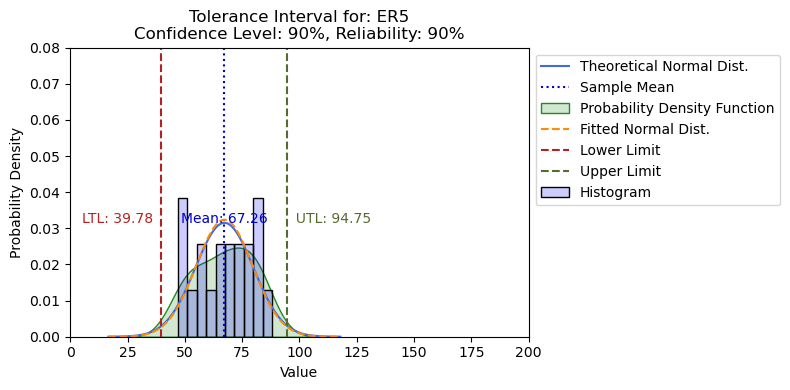

                 TOLERANCE INTERVAL CALCULATOR REPORT FOR: ER5                  

ENTERED PARAMETERS:
Sample Size: 19
Sample Mean: 67.26315789473684
Sample Standard Deviation: 12.652808670467676
Confidence Level: 90%
Reliability: 90%
Interval Type: Two-sided

RESULTS
Anderson-Darling Normality Test:
  Statistic: 0.31984210507481237
  Significance Levels: (in %):   15   |   10   |   5   |   2.5   |   1
  Critical Values:               0.505  |  0.575  |  0.690  |  0.804  |  0.957
  Normal? :                      True  |  True  |  True  |  True  |  True
k-value: 2.1721415251404013
Lower Tolerance Limit (LTL): 39.77946677195749
Upper Tolerance Limit (UTL): 94.74684901751618

Selected column: ER7
Data:  0      97.19
1      76.57
2      65.19
3      81.03
4      77.03
5      77.43
6      61.07
7     101.84
8      79.97
9      92.53
10     56.18
11     75.62
12     99.19
13     73.72
14     78.38
15     82.12
Name: ER7, dtype: float64
num_samples after:  16
Sample mean: 79.69125
Sample std d

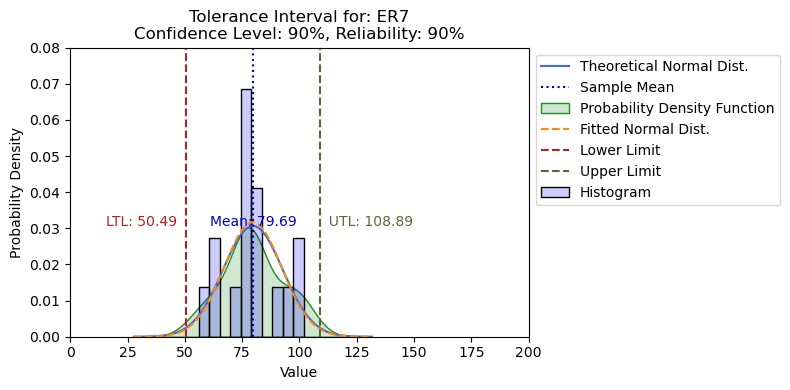

                 TOLERANCE INTERVAL CALCULATOR REPORT FOR: ER7                  

ENTERED PARAMETERS:
Sample Size: 16
Sample Mean: 79.69125
Sample Standard Deviation: 13.000720428755733
Confidence Level: 90%
Reliability: 90%
Interval Type: Two-sided

RESULTS
Anderson-Darling Normality Test:
  Statistic: 0.455746308766237
  Significance Levels: (in %):   15   |   10   |   5   |   2.5   |   1
  Critical Values:               0.500  |  0.569  |  0.683  |  0.797  |  0.948
  Normal? :                      True  |  True  |  True  |  True  |  True
k-value: 2.246139352475784
Lower Tolerance Limit (LTL): 50.489820234435896
Upper Tolerance Limit (UTL): 108.8926797655641



In [4]:
# Main function
def main():
    window = tk.Tk()
    window.title("Tolerance Interval and Sample Size Calculator")

    tk.Button(window, text="Open Tolerance Interval Calculator", command=tolerance_interval_calculation_window).pack(pady=10)
    # tk.Button(window, text="Open Sample Size Calculator", command=sample_size_calculation_window).pack(pady=10)

    window.mainloop()

if __name__ == "__main__":
    main()